In [106]:
import cv2
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import knn

In [17]:
DEFINED = 0
UNDEFINED = 255

In [89]:
mask = cv2.imread("data/64/mask/0018.png", cv2.IMREAD_GRAYSCALE)
mask = np.where(mask == 1, 255, 0)

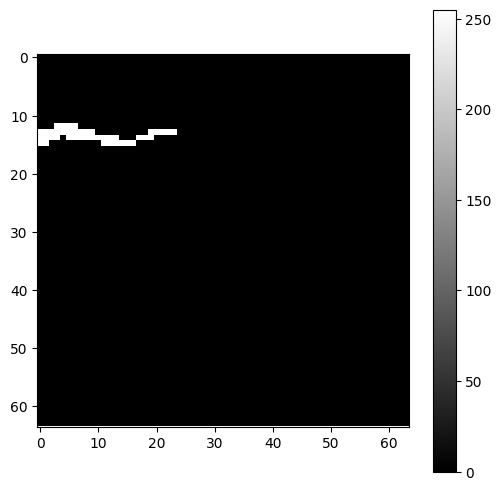

In [90]:
fig, axis = plt.subplots(1, 1, figsize=(6, 6))
pos = axis.imshow(mask, cmap="gray")
fig.colorbar(pos, ax=axis)
plt.show()

In [119]:
distances = np.zeros(mask.shape)
for y, x in np.argwhere(mask == 255):
    neighbor = knn.nn_circular_native_2(mask, (y, x), 1).pop()
    distances[y, x] = knn.euclidean_distance((y, x), neighbor)
mask = np.where(mask == 255, 0, 255)
for y, x in np.argwhere(mask == 255):
    neighbor = knn.nn_circular_native_2(mask, (y, x), 1).pop()
    distances[y, x] = knn.euclidean_distance((y, x), neighbor)

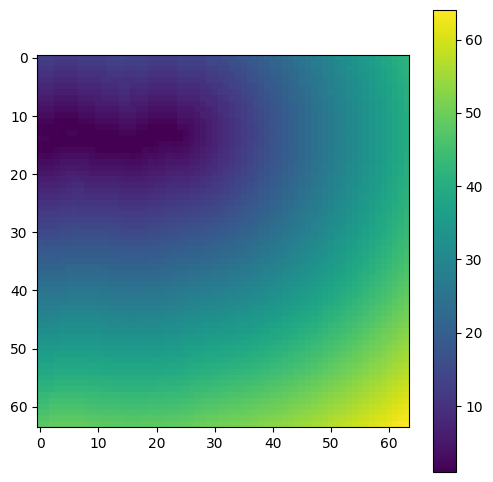

In [120]:
fig, axis = plt.subplots(1, 1, figsize=(6, 6))
pos = axis.imshow(distances)
fig.colorbar(pos, ax=axis)
plt.show()

In [121]:
distances = np.log(distances) + 0.25

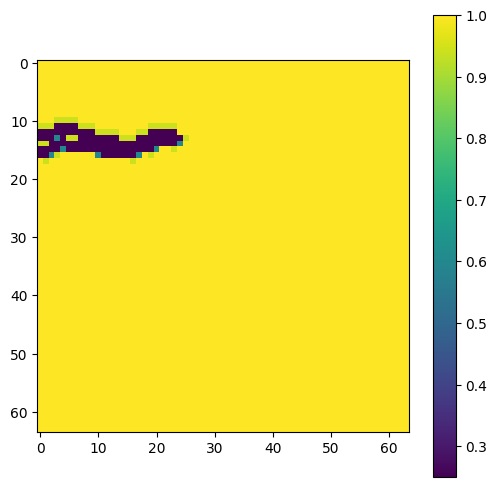

In [126]:
fig, axis = plt.subplots(1, 1, figsize=(6, 6))
pos = axis.imshow(distances.clip(0, 1))
fig.colorbar(pos, ax=axis)
plt.show()

In [ ]:
# Should be done before obviously

# target_scaled = torch.where(target == 1, 255, 0)
# distances = torch.zeros(target_scaled.shape)
# for y, x in torch.argwhere(target_scaled == 255):
#     neighbor = knn.nn_circular_native_2(target_scaled, (y, x), 1).pop()
#     distances[y, x] = knn.euclidean_distance((y, x), neighbor)
# target_scaled = torch.where(target_scaled == 255, 0, 255)
# for y, x in torch.argwhere(target_scaled == 255):
#     neighbor = knn.nn_circular_native_2(target_scaled, (y, x), 1).pop()
#     distances[y, x] = knn.euclidean_distance((y, x), neighbor)
# distances = (torch.log(target_scaled) + 0.25).clip(0, 1)

In [ ]:
class ClassborderWeightedBCELoss(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.bceloss = nn.BCELoss(reduction="none")
        self.act = nn.Sigmoid()

    def forward(self, pred: torch.Tensor, target: torch.Tensor, distances: torch.Tensor):
        loss = (self.bceloss(self.act(pred), target) * distances).mean()
        return loss
